<a href="https://colab.research.google.com/github/Donald-Taggart/Data-Analytics-Portfolio/blob/main/Milestone_Project_3_Mammography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 3 - Mammographic Mass Data Set


--- ---

# 1.0 Project Description
--- ---

This is the capstone project for the Wisconsin Data Science and Analytics course.

## 1.1 Problem Statement

Can you use a machine learning model to reduce the number of unneccessary biopsies using the Breast Imaging Reporting & Data System (BI-RADS) classification system?

#2.0 Data Description
--- ---

The source data is provided by the UCI Machine Learning Repository and the data description is copied here for reference.  

http://archive.ics.uci.edu/ml/datasets/mammographic+mass

## Source:

Matthias Elter
Fraunhofer Institute for Integrated Circuits (IIS)
Image Processing and Medical Engineering Department (BMT)
Am Wolfsmantel 33
91058 Erlangen, Germany
matthias.elter '@' iis.fraunhofer.de
(49) 9131-7767327

Prof. Dr. Rüdiger Schulz-Wendtland
Institute of Radiology, Gynaecological Radiology, University Erlangen-Nuremberg
Universitätsstraße 21-23
91054 Erlangen, Germany


## Data Set Information:

Mammography is the most effective method for breast cancer screening
available today. However, the low positive predictive value of breast
biopsy resulting from mammogram interpretation leads to approximately
70% unnecessary biopsies with benign outcomes. To reduce the high
number of unnecessary breast biopsies, several computer-aided diagnosis
(CAD) systems have been proposed in the last years.These systems
help physicians in their decision to perform a breast biopsy on a suspicious
lesion seen in a mammogram or to perform a short term follow-up
examination instead.
This data set can be used to predict the severity (benign or malignant)
of a mammographic mass lesion from BI-RADS attributes and the patient's age.
It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes
together with the ground truth (the severity field) for 516 benign and
445 malignant masses that have been identified on full field digital mammograms
collected at the Institute of Radiology of the
University Erlangen-Nuremberg between 2003 and 2006.
Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign)
to 5 (highly suggestive of malignancy) assigned in a double-review process by
physicians. Assuming that all cases with BI-RADS assessments greater or equal
a given value (varying from 1 to 5), are malignant and the other cases benign,
sensitivities and associated specificities can be calculated. These can be an
indication of how well a CAD system performs compared to the radiologists.

Class Distribution: benign: 516; malignant: 445


## Attribute Information:

6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes)

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal, goal field!)


Missing Attribute Values:
- BI-RADS assessment: 2
- Age: 5
- Shape: 31
- Margin: 48
- Density: 76
- Severity: 0


## Relevant Papers:

M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007)
The prediction of breast cancer biopsy outcomes using two CAD approaches that both emphasize an intelligible decision process.
Medical Physics 34(11), pp. 4164-4172



## Citation Request:

M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007)
The prediction of breast cancer biopsy outcomes using two CAD approaches that both emphasize an intelligible decision process.
Medical Physics 34(11), pp. 4164-4172

https://aapm.onlinelibrary.wiley.com/doi/abs/10.1118/1.2786864


# 3.0 Import Libraries and Upload Data
--- ---

In [ ]:
# Import necessary libraries

# Creating and using dataframes and plotting
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Creating and using machine learing pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
# Creating static Plotly images
# !pip install kaleido


In [ ]:
# Upload the 'mammographic_masses.csv' file from local file
# from google.colab import files
# mammographic_masses = files.upload()


Saving mammographic_masses.csv to mammographic_masses.csv


In [ ]:
# Upload the 'mammographic_masses.csv' file from GitHub Repo
url = "https://raw.githubusercontent.com/Donald-Taggart/Data-Analytics-Portfolio/main/Mammographic%20Prediction%20with%20BI-RADS%20Assessments/mammographic_masses.csv"


In [ ]:
# Create a list of column names
column_names = ['BI-RADS Assessment', 'Age', 'Shape', 'Margin', 'Density',
                'Severity'] # Target Variable

#Create a dataframe from local file
# masses_df = pd.read_csv('mammographic_masses.csv', names=column_names)

#Create a dataframe from GitHub Repo
masses_df = pd.read_csv(url, names=column_names)

#Head the dataframe
masses_df.head()

,BI-RADS Assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


# 4.0 Data Exploration and Discussion
--- ---

Obtain information about the data and start making decisions about data preparation.

In [ ]:
# Gain information about the dataframe
masses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS Assessment  959 non-null    float64
 1   Age                 956 non-null    float64
 2   Shape               930 non-null    float64
 3   Margin              913 non-null    float64
 4   Density             885 non-null    float64
 5   Severity            961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [ ]:
# Identify number of null values
masses_df.isnull().sum()

BI-RADS Assessment     2
Age                    5
Shape                 31
Margin                48
Density               76
Severity               0
dtype: int64

## 4.1 BI-RADS Assessment

The following is a helpful article containing information on BI-RADS Assessment scores.

https://www.healthline.com/health/birads-score

BI-RADS Assessment scores range from 0 to 6.  There is one entry with a BI-RADS score of 55.  This is a clear error.  However, BI-RADS scores are non-predictive.  Therefore, the `BI-RADS Assessment` column will be removed.

In [ ]:
# Value counts for each 'BI-RADS Assessment' category
masses_df['BI-RADS Assessment'].value_counts(ascending=True)

55.0      1
0.0       5
6.0      11
2.0      14
3.0      36
5.0     345
4.0     547
Name: BI-RADS Assessment, dtype: int64

## 4.2 Age

Subject ages range from 18 to 96.  There are 5 null values that will be imputed to the mean.  This feature will be stanadarized.

In [ ]:
# Plot 'Age'
fig = px.histogram(masses_df, # DataFrame
                   x='Age', # x-axis
                   width=1200, # Set figure width
                   height=600, # Set figure height
                   title='<b>Age<b>', #Change title and bold
                   text_auto=True, # Turn on bar totals
                   marginal="box", # or violin, rug, box
                   )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Number of Subjects', # Changes the y-axis title
                  )
fig.show()

# fig.write_image("Age.png", engine="kaleido")

In [ ]:
# Describe 'Age'
masses_df['Age'].describe()

count    956.000000
mean      55.487448
std       14.480131
min       18.000000
25%       45.000000
50%       57.000000
75%       66.000000
max       96.000000
Name: Age, dtype: float64

## 4.3 Shape and Margin

The following articles contain helpful information and photos for the various classifications for shape, margin, and density.  

https://radiopaedia.org/articles/breast-mass?lang=us

https://radiologyassistant.nl/breast/bi-rads/bi-rads-for-mammography-and-ultrasound-2013

https://www.ncbi.nlm.nih.gov/books/NBK343794/table/ch1.t1/

Shape and Margin are nominal data, and will be one-hot encoded.  Null values will not affect the model after one=hot encoding.

In [ ]:
# Value counts for each 'Shape' category
masses_df['Shape'].value_counts(ascending=True)

3.0     95
2.0    211
1.0    224
4.0    400
Name: Shape, dtype: int64

In [ ]:
# Plot 'Shape'
fig = px.histogram(masses_df, # DataFrame
                   x='Shape', # x-axis
                   width=1200, # Set figure width
                   height=600, # Set figure height
                   title='<b>Shape<b>', #Change title and bold
                   text_auto=True, # Turn on bar totals
                #    marginal="box", # or violin, rug, box
                   )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Number of Subjects', # Changes the y-axis title
                  )
fig.show()

# fig.write_image("Shape.png", engine="kaleido")

In [ ]:
# Value counts for each 'Margin' category
masses_df['Margin'].value_counts(ascending=True)

2.0     24
3.0    116
5.0    136
4.0    280
1.0    357
Name: Margin, dtype: int64

In [ ]:
# Plot 'Margin'
fig = px.histogram(masses_df, # DataFrame
                   x='Margin', # x-axis
                   width=1200, # Set figure width
                   height=600, # Set figure height
                   title='<b>Margin<b>', #Change title and bold
                   text_auto=True, # Turn on bar totals
                #    marginal="box", # or violin, rug, box
                   )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Number of Subjects', # Changes the y-axis title
                  )
fig.show()

# fig.write_image("Margin.png", engine="kaleido")

## 4.4 Density
The following articles contain helpful information for density.  

https://www.ncbi.nlm.nih.gov/books/NBK343794/table/ch1.t1/


Density is ordinal data.  The original study and dataset were published in 2007 and therefore, assumed to use the  BI-RADS 2003 density classification system. It contains four categories. Each category represents a quartile percentage of breast mass density with 1 representing less than 25% dense fibrous tissue, and 4 representing greater than 75% dense fibrous tissue. Null values will be imputed to the mean and standardized.

In [ ]:
# Value counts for each 'Density' category
masses_df['Density'].value_counts(ascending=True)

4.0     12
1.0     16
2.0     59
3.0    798
Name: Density, dtype: int64

In [ ]:
# Plot 'Density'
fig = px.histogram(masses_df, # DataFrame
                   x='Density', # x-axis
                   width=1200, # Set figure width
                   height=600, # Set figure height
                   title='<b>Density<b>', #Change title and bold
                   text_auto=True, # Turn on bar totals
                #    marginal="box", # or violin, rug, box
                   )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  yaxis_title ='Number of Subjects', # Changes the y-axis title
                  )
fig.show()

# fig.write_image("Density.png", engine="kaleido")

## 4.5 Severity

This is the target variable.  One means a malignant tumor.

In [ ]:
# Value counts for each 'Severity' category
masses_df['Severity'].value_counts(ascending=True)

1    445
0    516
Name: Severity, dtype: int64

#5.0 Data Preparation
--- ---
Separate the target variable, one-hot encode, and then split into train and test sets.

In [ ]:
# Identify the target variable
y = masses_df['Severity']

# Identify the features of interest
X = masses_df.drop(['BI-RADS Assessment', 'Severity'], axis=1)

# One_hot encode categorical data
one_hot = pd.get_dummies(data=X, columns = ['Shape','Margin'])
X = one_hot

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=42, stratify=y)

# Head X_train to verify results
X_train.head()

,Age,Density,Shape_1.0,Shape_2.0,Shape_3.0,Shape_4.0,Margin_1.0,Margin_2.0,Margin_3.0,Margin_4.0,Margin_5.0
949,53.0,3.0,0,1,0,0,1,0,0,0,0
390,74.0,3.0,0,0,0,1,0,0,0,1,0
750,64.0,3.0,1,0,0,0,1,0,0,0,0
882,30.0,3.0,1,0,0,0,1,0,0,0,0
250,32.0,3.0,1,0,0,0,1,0,0,0,0


# 6.0 Logistic Regression Model
--- ---

Best C: 0.5
The Logistic Regression Model train accuracy (cv=10) is: 81.25 %
The Logistic Regression Model test accuracy is: 80.49793 %


,precision,recall,f1-score,support
0,0.879630,0.736434,0.801688,129.000000
1,0.744361,0.883929,0.808163,112.000000
accuracy,0.804979,0.804979,0.804979,0.804979
macro avg,0.811995,0.810181,0.804926,241.000000
weighted avg,0.816766,0.804979,0.804697,241.000000


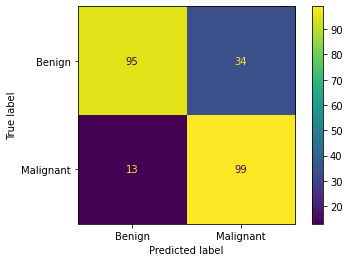

In [ ]:
# Create a Logistic Regression Model pipeline
pipe_log_reg = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                    strategy='mean')), # Impute missing data to the mean
                         ('scaler', StandardScaler()), # Standardize the data
                         ('logreg', LogisticRegression(random_state=0,
                                                       penalty='l2',
                                                       solver='liblinear'))]) # Logistic Regression model

# Create a list of C values for hyperparamter tuning
C = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 2, 3, 4, 5] 

# Create a parameter space for grid search
parameters = {'logreg__C' : C}

# Create grid search object
gs_logreg = GridSearchCV(pipe_log_reg, parameters, cv=10)

# Fit the grid search
gs_logreg.fit(X_train, y_train)

# View the best parameters
print('Best C:', gs_logreg.best_estimator_.get_params()['logreg__C'])

# Calculate the accuracy for the train data
gs_logreg_train_accuracy = gs_logreg.score(X_train, y_train)

# Calculate the test data accuracy
log_reg_test_accuracy = gs_logreg.score(X_test, y_test)

# Print the train data accuracy
print('The Logistic Regression Model train accuracy (cv=10) is:',
      (round(gs_logreg_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The Logistic Regression Model test accuracy is:',
      (round(log_reg_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_logreg = gs_logreg.predict(X_test)

# Create and plot a confusion matrix
cm_logreg = confusion_matrix(y_test, y_hat_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg,
                              display_labels=['Benign', 'Malignant'])
disp.plot()

# Compute and print a classification report
logreg_report = classification_report(y_test, y_hat_logreg, output_dict=True)
logreg_metrics = pd.DataFrame(logreg_report).transpose()
logreg_metrics


In [ ]:
# Compute Recall and Precision Scores
recall_logreg = recall_score(y_test, y_hat_logreg)
precision_logreg = precision_score(y_test, y_hat_logreg)

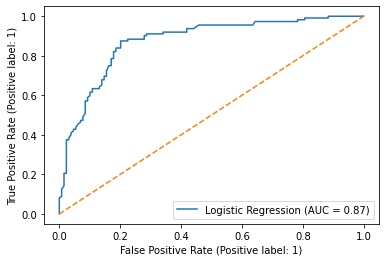

In [ ]:
# Create an ROC AUC Curve
disp = RocCurveDisplay.from_estimator(gs_logreg, X_test, y_test, name='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--');

# 7.0 K-Nearest Neighbors Model
--- ---

Best Number of Neighbors: 13
The K Nearest Neighbors Model train accuracy (cv=10) is: 80.55556 %
The K Nearest Neighbors Model test accuracy is: 79.25311 %


,precision,recall,f1-score,support
0,0.876190,0.713178,0.786325,129.000000
1,0.727941,0.883929,0.798387,112.000000
accuracy,0.792531,0.792531,0.792531,0.792531
macro avg,0.802066,0.798553,0.792356,241.000000
weighted avg,0.807295,0.792531,0.791931,241.000000


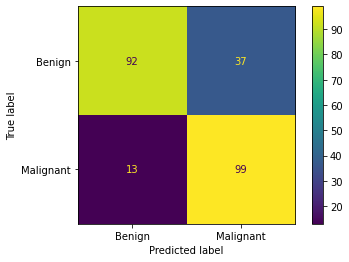

In [ ]:
# Construct a K Nearest Neighbors pipeline to impute, scale, and classify
pipe_knn = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                strategy='mean')), # Impute missing data to the mean
                     ('scaler', StandardScaler()), # Standardize the data
                     ('knn_model', KNeighborsClassifier())]) # Instantiate a KNN model

# Create a list of number of neighbors
n_features_to_select = list(range(1,30))

# Create a parameter space for grid search
parameters = {'knn_model__n_neighbors' : n_features_to_select}

# Create grid search object
gs_knn = GridSearchCV(pipe_knn, parameters, cv=10)

# Fit the grid search
gs_knn.fit(X_train, y_train)

# View the best parameters
print('Best Number of Neighbors:',
      gs_knn.best_estimator_.get_params()['knn_model__n_neighbors'])

# Calculate the accuracy for the train data
knn_train_accuracy = gs_knn.score(X_train, y_train)

# Calculate the accuracy for the test data
knn_test_accuracy = gs_knn.score(X_test, y_test)

# Print the train data accuracy
print('The K Nearest Neighbors Model train accuracy (cv=10) is:',
      (round(knn_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The K Nearest Neighbors Model test accuracy is:',
      (round(knn_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_knn = gs_knn.predict(X_test)

# Create and plot a confusion matrix
cm_knn = confusion_matrix(y_test, y_hat_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=['Benign', 'Malignant'])
disp.plot()

# Compute and print a classification report
knn_report = classification_report(y_test, y_hat_knn, output_dict=True)
knn_metrics = pd.DataFrame(knn_report).transpose()
knn_metrics


In [ ]:
# Compute Recall and Precision Scores
recall_knn = recall_score(y_test, y_hat_knn)
precision_knn = precision_score(y_test, y_hat_knn)

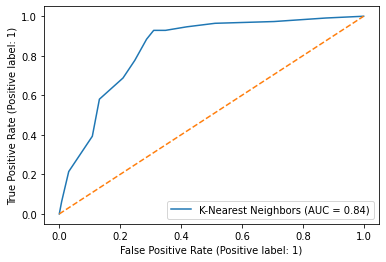

In [ ]:
# Create an ROC AUC Curve
disp = RocCurveDisplay.from_estimator(gs_knn, X_test, y_test, name='K-Nearest Neighbors')
plt.plot([0, 1], [0, 1], linestyle='--');

# 8.0 Support Vector Machine Model
--- ---

Best C: 2
Best kernel: rbf
The Support Vector Model train accuracy (cv=10) is: 82.77778 %
The Support Vector Model test accuracy is: 79.25311 %


,precision,recall,f1-score,support
0,0.849558,0.744186,0.793388,129.000000
1,0.742188,0.848214,0.791667,112.000000
accuracy,0.792531,0.792531,0.792531,0.792531
macro avg,0.795873,0.796200,0.792528,241.000000
weighted avg,0.799659,0.792531,0.792588,241.000000


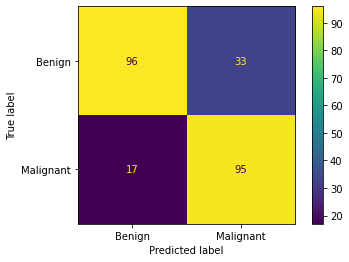

In [ ]:
# Construct a Support Vector Machine pipeline to impute, scale, and classify
pipe_SVC = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                strategy='mean')), # Impute missing data to the mean
                     ('scaler', StandardScaler()), # Standardize the data
                     ('SVC_model', SVC())]) # Instantiate a SVC model

# Create a list of C values for hyperparamter tuning
C = list(range(1,len(X_train.columns)+1))

# Create a parameter space for grid search
parameters = {'SVC_model__C' : C,
              'SVC_model__kernel' : ['poly', 'linear', 'rbf']
              }

# Create grid search object
gs_SVC = GridSearchCV(pipe_SVC, parameters, cv=10)

# Fit the grid search to the training data
gs_SVC.fit(X_train, y_train)

# View the best parameters
print('Best C:', gs_SVC.best_estimator_.get_params()['SVC_model__C'])
print('Best kernel:', gs_SVC.best_estimator_.get_params()['SVC_model__kernel'])

# Calculate the accuracy for the train data
gs_SVC_train_accuracy = gs_SVC.score(X_train, y_train)

# Calculate the accuracy for the test data
gs_SVC_test_accuracy = gs_SVC.score(X_test, y_test)

# Print the train data accuracy
print('The Support Vector Model train accuracy (cv=10) is:',
      (round(gs_SVC_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The Support Vector Model test accuracy is:',
      (round(gs_SVC_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_SVC = gs_SVC.predict(X_test)

# Create and plot a confusion matrix
cm_SVC = confusion_matrix(y_test, y_hat_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVC,
                              display_labels=['Benign', 'Malignant'])
disp.plot()

# Compute and print a classification report
SVC_report = classification_report(y_test, y_hat_SVC, output_dict=True)
SVC_metrics = pd.DataFrame(SVC_report).transpose()
SVC_metrics


In [ ]:
# Compute Recall and Precision Scores
recall_svc = recall_score(y_test, y_hat_SVC)
precision_svc = precision_score(y_test, y_hat_SVC)

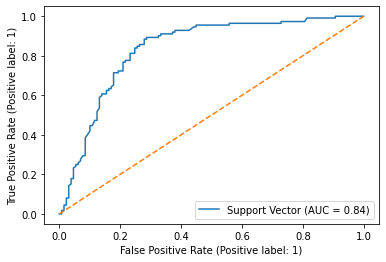

In [ ]:
# Create an ROC AUC Curve
disp = RocCurveDisplay.from_estimator(gs_SVC, X_test, y_test, name='Support Vector')
plt.plot([0, 1], [0, 1], linestyle='--');

# 9.0 Decision Tree Model

Best Criterion: entropy
Best Depth: 5
Best Number of Features: 8
The Decision Tree Model train accuracy (cv=10) is: 82.22222 %
The Decision Tree Model test accuracy is: 79.66805 %


,precision,recall,f1-score,support
0,0.877358,0.720930,0.791489,129.00000
1,0.733333,0.883929,0.801619,112.00000
accuracy,0.796680,0.796680,0.796680,0.79668
macro avg,0.805346,0.802429,0.796554,241.00000
weighted avg,0.810426,0.796680,0.796197,241.00000


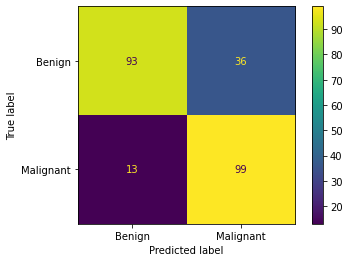

In [ ]:
# Construct a Decision Tree pipeline to impute, scale, and classify
pipe_tree = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                 strategy='mean')), # Impute missing data to the mean
                      ('scaler', StandardScaler()), # Standardize the data
                      ('tree', DecisionTreeClassifier(random_state=42))]) # Instantiate a tree model

# Create a list of features to select
n_features_to_select = list(range(1,len(X_train.columns)+1))

# Create a parameter space for grid search
parameters = {
              'tree__max_depth' : n_features_to_select,
              'tree__max_features' : n_features_to_select,
              'tree__criterion' : ['entropy'] # ['gini', 'entropy']
              }

# Create grid search object
gs_tree = GridSearchCV(pipe_tree, parameters, cv=10)

# Fit the model to the training data
gs_tree.fit(X_train, y_train)

# View the best parameters
print('Best Criterion:',
      gs_tree.best_estimator_.get_params()['tree__criterion'])
print('Best Depth:',
      gs_tree.best_estimator_.get_params()['tree__max_depth'])
print('Best Number of Features:',
      gs_tree.best_estimator_.get_params()['tree__max_features'])

# Calculate the accuracy for the train data
tree_train_accuracy = gs_tree.score(X_train, y_train)

# Calculate the accuracy for the test data
tree_test_accuracy = gs_tree.score(X_test, y_test)

# Print the train data accuracy
print('The Decision Tree Model train accuracy (cv=10) is:',
      (round(tree_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The Decision Tree Model test accuracy is:',
      (round(tree_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_tree = gs_tree.predict(X_test)

# Create and plot a confusion matrix
cm_tree = confusion_matrix(y_test, y_hat_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,
                              display_labels=['Benign', 'Malignant'])
disp.plot()

# Compute and print a classification report
tree_report = classification_report(y_test, y_hat_tree, output_dict=True)
tree_metrics = pd.DataFrame(tree_report).transpose()
tree_metrics


In [ ]:
# Compute Recall and Precision Scores
recall_tree = recall_score(y_test, y_hat_tree)
precision_tree = precision_score(y_test, y_hat_tree)

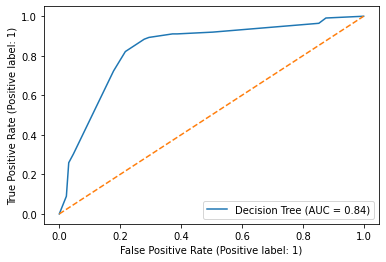

In [ ]:
# Create an ROC AUC Curve
disp = RocCurveDisplay.from_estimator(gs_tree, X_test, y_test, name='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--');

#10.0 Random Forest Model

Best Criterion: entropy
Best Depth: 5
Best Number of Features: 4
The Random Forest Model train accuracy (cv=10) is: 82.22222 %
The Random Forest Model test accuracy is: 79.66805 %


,precision,recall,f1-score,support
0,0.877358,0.720930,0.791489,129.00000
1,0.733333,0.883929,0.801619,112.00000
accuracy,0.796680,0.796680,0.796680,0.79668
macro avg,0.805346,0.802429,0.796554,241.00000
weighted avg,0.810426,0.796680,0.796197,241.00000


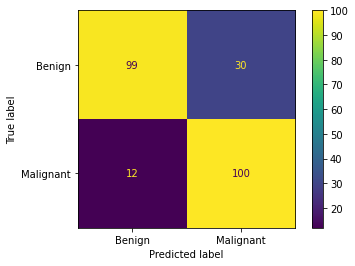

In [ ]:
# Construct a Random Forest pipeline to impute, scale, and classify
pipe_RF_tree = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                 strategy='mean')), # Impute missing data to the mean
                         ('scaler', StandardScaler()), # Standardize the data
                         ('RF_tree', RandomForestClassifier(random_state=42))]) # Instantiate a tree model

# Create a list of features to select
n_features_to_select = list(range(1,10))

# Create a list of max depth to select
max_depth = list(range(1,10))

# Create a parameter space for grid search
parameters = {
              'RF_tree__max_depth' : max_depth,
              'RF_tree__max_features' : n_features_to_select,
              'RF_tree__criterion' : ['entropy'] # ['gini', 'entropy']
              }

# Create grid search object
gs_RF_tree = GridSearchCV(pipe_RF_tree, parameters, cv=10)

# Fit the model to the training data
gs_RF_tree.fit(X_train, y_train)

# View the best parameters
print('Best Criterion:',
      gs_RF_tree.best_estimator_.get_params()['RF_tree__criterion'])
print('Best Depth:', 
      gs_RF_tree.best_estimator_.get_params()['RF_tree__max_depth'])
print('Best Number of Features:',
      gs_RF_tree.best_estimator_.get_params()['RF_tree__max_features'])

# Calculate the accuracy for the train data
RF_train_accuracy = gs_RF_tree.score(X_train, y_train)

# Calculate the accuracy for the test data
RF_test_accuracy = gs_RF_tree.score(X_test, y_test)

# Print the train data accuracy
print('The Random Forest Model train accuracy (cv=10) is:',
      (round(tree_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The Random Forest Model test accuracy is:',
      (round(tree_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_RF_tree = gs_RF_tree.predict(X_test)

# Create and plot a confusion matrix
cm_tree = confusion_matrix(y_test, y_hat_RF_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,
                              display_labels=['Benign', 'Malignant'])
disp.plot()

# Compute and print a classification report
RF_tree_report = classification_report(y_test, y_hat_RF_tree, output_dict=True)
RF_tree_metrics = pd.DataFrame(tree_report).transpose()
RF_tree_metrics


In [ ]:
# Compute Recall and Precision Scores
recall_RF_tree = recall_score(y_test, y_hat_RF_tree)
precision_RF_tree = precision_score(y_test, y_hat_RF_tree)

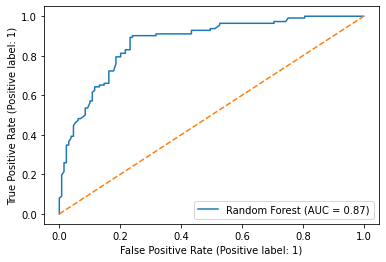

In [ ]:
# Create an ROC AUC Curve
disp = RocCurveDisplay.from_estimator(gs_RF_tree, X_test, y_test, name='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--');

#11.0 AdaBoost Model

Best Number of Estimators: 70
Best Learning Rate: 0.5
The AdaBoost Model train accuracy (cv=10) is: 81.38889 %
The AdaBoost Model test accuracy is: 82.98755 %


,precision,recall,f1-score,support
0,0.900000,0.767442,0.828452,129.000000
1,0.770992,0.901786,0.831276,112.000000
accuracy,0.829876,0.829876,0.829876,0.829876
macro avg,0.835496,0.834614,0.829864,241.000000
weighted avg,0.840046,0.829876,0.829764,241.000000


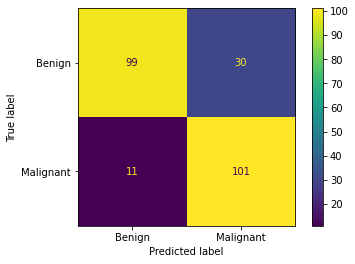

In [ ]:
# Construct a AdaBoost pipeline to impute, scale, and classify
pipe_Ada = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                strategy='mean')), # Impute missing data to the mean
                      ('scaler', StandardScaler()), # Standardize the data
                      ('Ada', AdaBoostClassifier(random_state=42))]) # Instantiate a AdaBoost model

# Create a list of estimators
n_features_to_select = [40, 50, 70, 80, 90, 100]

# Create a list of learning rates for hyperparamter tuning
learning_rate = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]

# Create a parameter space for grid search
parameters = {
              'Ada__n_estimators' : n_features_to_select,
              'Ada__learning_rate' : learning_rate,
              }

# Create grid search object
gs_Ada = GridSearchCV(pipe_Ada, parameters, cv=10)

# Fit the model to the training data
gs_Ada.fit(X_train, y_train)

# View the best parameters
print('Best Number of Estimators:',
      gs_Ada.best_estimator_.get_params()['Ada__n_estimators'])
print('Best Learning Rate:',
      gs_Ada.best_estimator_.get_params()['Ada__learning_rate'])

# Calculate the accuracy for the train data
Ada_train_accuracy = gs_Ada.score(X_train, y_train)

# Calculate the accuracy for the test data
Ada_test_accuracy = gs_Ada.score(X_test, y_test)

# Print the train data accuracy
print('The AdaBoost Model train accuracy (cv=10) is:',
      (round(Ada_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The AdaBoost Model test accuracy is:',
      (round(Ada_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_Ada = gs_Ada.predict(X_test)

# Create and plot a confusion matrix
cm_Ada = confusion_matrix(y_test, y_hat_Ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_Ada,
                              display_labels=['Benign', 'Malignant'])
disp.plot()

# Compute and print a classification report
Ada_report = classification_report(y_test, y_hat_Ada, output_dict=True)
Ada_metrics = pd.DataFrame(Ada_report).transpose()
Ada_metrics

# Save Figure
# plt.savefig('AdaBoost Confusion.png')

In [ ]:
# Compute Recall and Precision Scores
recall_Ada = recall_score(y_test, y_hat_Ada)
precision_Ada = precision_score(y_test, y_hat_Ada)

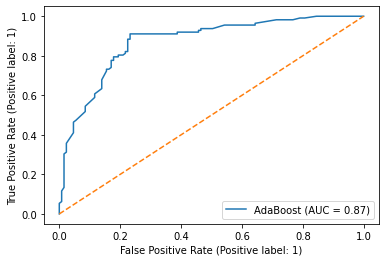

In [ ]:
# Create an ROC AUC Curve
disp = RocCurveDisplay.from_estimator(gs_Ada, X_test, y_test, name='AdaBoost')
plt.plot([0, 1], [0, 1], linestyle='--');

# Save Figure
# plt.savefig('AdaBoost AUC.png')

# 12.0 Gradient Boost Model

Best Number of Estimators: 10
Best Learning Rate: 0.5
The GradientBoosting Model train accuracy (cv=10) is: 80.69444 %
The GradientBoosting Model test accuracy is: 80.91286 %


,precision,recall,f1-score,support
0,0.887850,0.736434,0.805085,129.000000
1,0.746269,0.892857,0.813008,112.000000
accuracy,0.809129,0.809129,0.809129,0.809129
macro avg,0.817060,0.814646,0.809046,241.000000
weighted avg,0.822053,0.809129,0.808767,241.000000


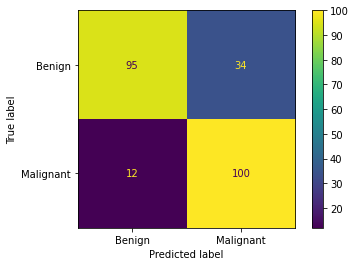

In [ ]:
# Construct a GradientBoosting pipeline to impute, scale, and classify
pipe_GB = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,
                                                 strategy='mean')), # Impute missing data to the mean
                      ('scaler', StandardScaler()), # Standardize the data
                      ('GB', GradientBoostingClassifier(random_state=42))]) # Instantiate a GradientBoosting model

# Create a list of estimators
n_esimators_to_select = [1, 3, 5, 10, 20, 30, 40, 50]

# Create a list of maximum depths
max_depth = [1, 2, 3, 4, 5]

# Create a list of learning rates for hyperparamter tuning
learning_rate = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Create a parameter space for grid search
parameters = {
              'GB__n_estimators' : n_esimators_to_select,
              'GB__max_depth' : max_depth,
              'GB__learning_rate' : learning_rate,
              }

# Create grid search object
gs_GB = GridSearchCV(pipe_GB, parameters, cv=10)

# Fit the model to the training data
gs_GB.fit(X_train, y_train)

# View the best parameters
print('Best Number of Estimators:',
      gs_GB.best_estimator_.get_params()['GB__n_estimators'])
# print('Best Maximum Depth:',
    #   gs_GB.best_estimator_.get_params()['GB__max_depth'])
print('Best Learning Rate:',
      gs_GB.best_estimator_.get_params()['GB__learning_rate'])

# Calculate the accuracy for the train data
GB_train_accuracy = gs_GB.score(X_train, y_train)

# Calculate the accuracy for the test data
GB_test_accuracy = gs_GB.score(X_test, y_test)

# Print the train data accuracy
print('The GradientBoosting Model train accuracy (cv=10) is:',
      (round(GB_train_accuracy*100,5)), '%')

# Print the test data accuracy
print('The GradientBoosting Model test accuracy is:',
      (round(GB_test_accuracy*100,5)), '%')

# Compute the predicted probabilities for the test data
y_hat_GB = gs_GB.predict(X_test)

# Create and plot a confusion matrix
cm_GB = confusion_matrix(y_test, y_hat_GB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_GB,
                              display_labels=['Benign', 'Malignant'])
disp.plot()

# Compute and print a classification report
GB_report = classification_report(y_test, y_hat_GB, output_dict=True)
GB_metrics = pd.DataFrame(GB_report).transpose()
GB_metrics


In [ ]:
# Compute Recall and Precision Scores
recall_GB = recall_score(y_test, y_hat_GB)
precision_GB = precision_score(y_test, y_hat_GB)

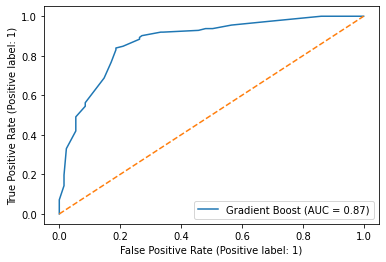

In [ ]:
# Create an ROC AUC Curve
disp = RocCurveDisplay.from_estimator(gs_GB, X_test, y_test, name='Gradient Boost')
plt.plot([0, 1], [0, 1], linestyle='--');

#13.0 Results
--- ---

In [ ]:
# Present Results
classifier_df = pd.DataFrame(['Logistic Regression', 'K_Nearest Neighbors',
                              'Support Vector Machine', 'Decision Tree', 'Random Forest',
                              'AdaBoost', 'GradientBoost'])

train_results_df = pd.DataFrame([gs_logreg_train_accuracy, knn_train_accuracy,
                              gs_SVC_train_accuracy, tree_train_accuracy,
                              RF_train_accuracy, Ada_train_accuracy,
                              GB_train_accuracy])

test_results_df = pd.DataFrame([log_reg_test_accuracy, knn_test_accuracy,
                             gs_SVC_test_accuracy, tree_test_accuracy,
                             RF_test_accuracy, Ada_test_accuracy,
                             GB_test_accuracy])

test_recall_df = pd.DataFrame([recall_logreg, recall_knn, recall_svc, recall_tree,
                               recall_RF_tree, recall_Ada, recall_GB])

test_precision_df = pd.DataFrame([precision_logreg, precision_knn, precision_svc,
                                  precision_tree, precision_RF_tree,
                                  precision_Ada, precision_GB])

# Create DataFrame containin results
results_df = pd.concat([classifier_df, train_results_df, test_results_df,
                        test_recall_df, test_precision_df], axis=1)
results_df.columns =['Model', 'Training Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision']
results_df['Training Accuracy'] = results_df['Training Accuracy']*100
results_df['Test Accuracy'] = results_df['Test Accuracy']*100
results_df['Test Recall'] = results_df['Test Recall']*100
results_df['Test Precision'] = results_df['Test Precision']*100

# Print the results DataFrame
results_df

,Model,Training Accuracy,Test Accuracy,Test Recall,Test Precision
0,Logistic Regression,81.250000,80.497925,88.392857,74.436090
1,K_Nearest Neighbors,80.555556,79.253112,88.392857,72.794118
2,Support Vector Machine,82.777778,79.253112,84.821429,74.218750
3,Decision Tree,82.222222,79.668050,88.392857,73.333333
4,Random Forest,82.222222,82.572614,89.285714,76.923077
5,AdaBoost,81.388889,82.987552,90.178571,77.099237
6,GradientBoost,80.694444,80.912863,89.285714,74.626866


## 13.1 Training Accuracy

In [ ]:
# Display the Training Results
fig = px.bar(results_df, # DataFrame
             x='Training Accuracy', # X axis
             y='Model', # y axis
             orientation='h', # horizontal orientation
             title='<b>Training Data % Accuracy<b>', # Bold Title
             width=1000, # Set figure width
             height=600, # Set figure height
             text_auto=True, # Turn on bar totals
             color='Model', # column to color by
             color_discrete_sequence=px.colors.qualitative.G10, # Color Pallete
             )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  barmode='stack', # Stack the bars
                  yaxis={'categoryorder' : 'total ascending'}, # descending order                 
                  )
fig.show()

# fig.write_image("Training.png", engine="kaleido")


## 13.2 Test Accuracy

In [ ]:
# Display the Test Results
fig = px.bar(results_df, # DataFrame
             x='Test Accuracy', # X axis
             y='Model', # y axis
             orientation='h', # horizontal orientation
             title='<b>Test Data % Accuracy<b>', # Bold Title
             width=1000, # Set figure width
             height=600, # Set figure height
             text_auto=True, # Turn on bar totals
             color='Model', # column to color by
             color_discrete_sequence=px.colors.qualitative.G10, # Color Pallete
             )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  barmode='stack', # Stack the bars
                  yaxis={'categoryorder' : 'total ascending'}, # descending order
                  )
fig.show()

# fig.write_image("Test.png", engine="kaleido")


## 13.4 Test Recall

In [ ]:
# Display the Test Results
fig = px.bar(results_df, # DataFrame
             x='Test Recall', # X axis
             y='Model', # y axis
             orientation='h', # horizontal orientation
             title='<b>Test Data % Recall<b>', # Bold Title
             width=1000, # Set figure width
             height=600, # Set figure height
             text_auto=True, # Turn on bar totals
             color='Model', # column to color by
             color_discrete_sequence=px.colors.qualitative.G10, # Color Pallete
             )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  barmode='stack', # Stack the bars
                  yaxis={'categoryorder' : 'total ascending'}, # descending order
                  )
fig.show()

# fig.write_image("Recall.png", engine="kaleido")

## 13.4 Test Precision

In [ ]:
# Display the Test Results
fig = px.bar(results_df, # DataFrame
             x='Test Precision', # X axis
             y='Model', # y axis
             orientation='h', # horizontal orientation
             title='<b>Test Data % Precision<b>', # Bold Title
             width=1000, # Set figure width
             height=600, # Set figure height
             text_auto=True, # Turn on bar totals
             color='Model', # column to color by
             color_discrete_sequence=px.colors.qualitative.G10, # Color Pallete
             )

fig.update_layout(title_x=.5, # Centers the Title
                  titlefont={'size': 24}, # title size
                  barmode='stack', # Stack the bars
                  yaxis={'categoryorder' : 'total ascending'}, # descending order
                  )
fig.show()

# fig.write_image("Precision.png", engine="kaleido")

## 13.5 ROC AUC Curves

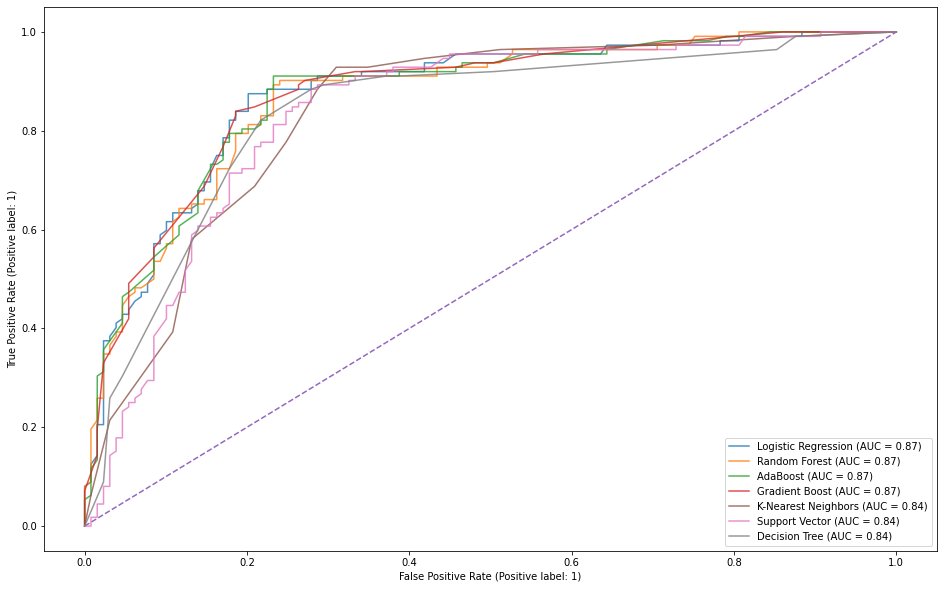

In [ ]:
# ROC AUC plot for all models
plt.figure(figsize=(16,10)) # define figure size
ax = plt.gca()
# Logistic Regression Model
RocCurveDisplay.from_estimator(gs_logreg, X_test, y_test, alpha=0.8, ax=ax, name='Logistic Regression')
# Random Forest Model
RocCurveDisplay.from_estimator(gs_RF_tree, X_test, y_test, alpha=0.8, ax=ax, name='Random Forest')
# AdaBoost Model
RocCurveDisplay.from_estimator(gs_Ada, X_test, y_test, alpha=0.8, ax=ax, name='AdaBoost')
# Gradient Boost Model
RocCurveDisplay.from_estimator(gs_GB, X_test, y_test, alpha=0.8, ax=ax, name='Gradient Boost')
plt.plot([0, 1], [0, 1], linestyle='--')
# K-Nearest Neighbors Model
RocCurveDisplay.from_estimator(gs_knn, X_test, y_test, alpha=0.8, ax=ax, name='K-Nearest Neighbors')
# Support Vector Machine Model
RocCurveDisplay.from_estimator(gs_SVC, X_test, y_test, alpha=0.8, ax=ax, name='Support Vector')
# Decision Tree Model
RocCurveDisplay.from_estimator(gs_tree, X_test, y_test, alpha=0.8, ax=ax, name='Decision Tree')
# Save Figure to File
# plt.savefig('BIRADS_ROC_AUC.png');

# 14.0 Additional References

The ACR BI-RADS® Experience: Learning From History
Elizabeth S. Burnside, MD, MPH, MS,a Edward A. Sickles, MD,b Lawrence W. Bassett, MD,c Daniel L. Rubin, MD, MS,d Carol H. Lee, MD,e Debra M. Ikeda, MD,d Ellen B. Mendelson, MD,f Pamela A. Wilcox,g Priscilla F. Butler,g and Carl J. D’Orsi, MDh

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3099247/
